# Applications of Data Science
# Lab 4
# Analysis of Images

## Overview

Images are a widely used unstructured data type, and analysis and preparation of images is a common data science task. In this notebook, you will explore the basics of image processing with Python tools.

## What you will need
To complete this lab, you will need the following:
- A web browser and Internet connection
- An Azure ML workspace
- The lab files for this lab

****
**Note** To set up the required environment for the lab, follow the instructions in the Setup document.
****

## Explore an image 

In this exercise, you will explore the properties of a gray scale image. As a first step read the image by executing the code in the cell below. This code will cache the images as files in your working directory. **You must have read and write permisison to your working directory.**

In [1]:
from PIL import Image
import requests
import numpy as np
from io import BytesIO

url = "https://github.com/MicrosoftLearning/Applied-Machine-Learning/raw/master/Labs/Faces/Steve.jpg"

response = requests.get(url)
steve = np.array(Image.open(BytesIO(response.content)))


 

You can determine the type of the image object by executing the code in the cell below. 

In [2]:
type(steve)

numpy.ndarray

Note that the image is an ordinary Numpy array.

You can determine the type of the data in this array by executing the code in the cell below.

In [3]:
steve.dtype

dtype('uint8')

It is now clear that the image is a Numpy array of unsigned 8 bit integers. 

You can determine the shape of the image array by executing the code in the cell below. 

In [4]:
steve.shape

(1661, 1113, 3)

The image is a Numpy arrary of unsigned 8 bit integers of dimension 1661x1113.

You can plot an Numpy array image using the **imshow** function from the matplotlib package. Execute the code in the cell below to create a pseudocolor plot of the image in the Numpy array. 

****
**Note:** when plotting inline with matplotlib in a Jupyter notebook, you need to run the 'magic' command shown in the first line of the cell below. 
****

/home/nbuser/anaconda3_23/lib/python3.4/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/home/nbuser/anaconda3_23/lib/python3.4/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


'Done'

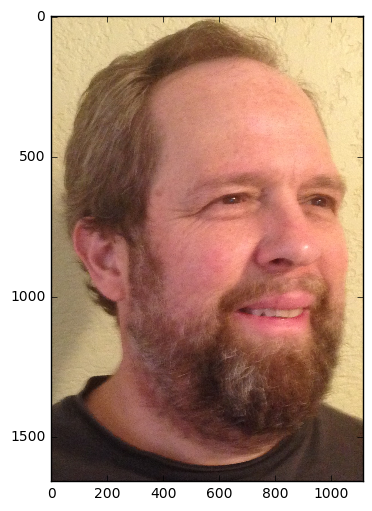

In [5]:
%matplotlib inline 
def plot_im(im):
    import matplotlib.pyplot as plt
    import numpy as np
    fig = plt.figure(figsize=(8, 6))
    fig.clf()
    ax = fig.gca()    
    ax.imshow(im)
    return 'Done'
plot_im(steve)

## Histograms and equalization

It is often the case that a raw image does not have the favorable statistical properties required for further analysis. For example, poor contrast in the image can make it difficult to detect features. Histogram equalization is a widely used method for improving the properties of an image. 

One tool for examining the statistical properties of an image is a histogram.  Ideally, the histogram of the image should be close to a uniform distribution. The code in the cell below computes and displays the histogram of the image. Note that the Numpy **flatten** method is applied to the array. This method removes the dimension attribute, creating a one dimensional array. Execute the code in this cell to display the histogram. 

'Done'

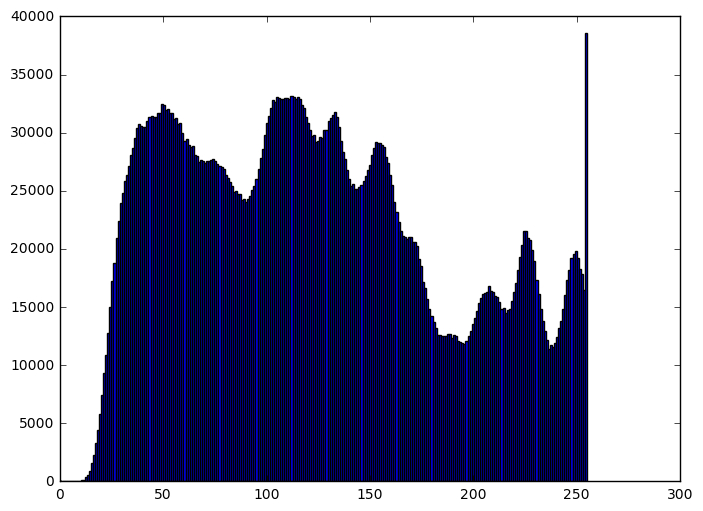

In [6]:
def hist_im(im, bins = 256): 
    """ Display histogram of flattened image"""
    import matplotlib.pyplot as plt    
    import numpy as np
    fig = plt.figure(figsize=(8, 6))
    fig.clf()
    ax = fig.gca()    
    ax.hist(np.array(im).flatten(), bins = bins)
    return 'Done'
hist_im(steve)

Examine this histogram noticing, that with a number of sharp peaks, it is not terribly uniform. 

Another tool for visualizing the statistics of an image is the cumulative distribution function plot. Execute the code in the cell below to compute and display the CDF plot of the gray-scale image.

'Done'

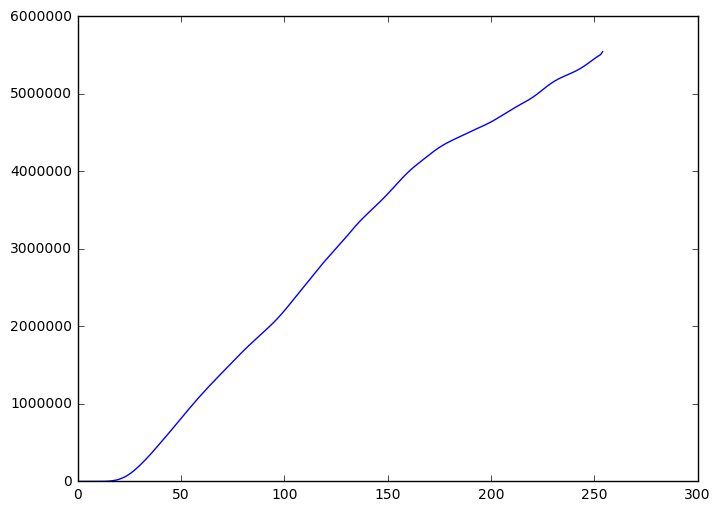

In [7]:
def cdf_im(im, bins = 256): 
    """Display cumulative distirbution of flattened image"""
    import matplotlib.pyplot as plt    
    import numpy as np

    y, x = np.histogram(np.array(im).flatten(), bins = bins)    
    y = y.cumsum()
    
    fig = plt.figure(figsize=(8, 6))
    fig.clf()
    ax = fig.gca()    
    ax.plot(x[:256], y)
    return 'Done'     
cdf_im(steve)

The CDF of an image with uniformly distributed pixel value is a straight line. Examine the above chart and notice that this CDF is curved, particularly at the ends. 

Histogram equalization is often used to improve the statistics of images. In simple terms, the histogram equalization algorithm attempts to adjust the pixel values in the image to create a more uniform distribution. The code in the cell below uses a simple linear interpolation method on the image histogram to equalize the image. Execute the code in the cell to equalize the image. 

In [8]:
def image_equalize(im, num_bins = 256):
    """Function to equalize the image"""
    import numpy as np
    ## Compute the histogram of flattened image
    imhist, bins = np.histogram(im.flatten(), num_bins, normed=True)
    
    cdf = imhist.cumsum() #cumulative distribution function
    cdf = 255 * cdf / cdf[-1]  # normalize
    
    ## Interpolate to equalize the image
    out = np.interp(im.flatten(), bins[:-1], cdf)
    return out.reshape(im.shape)

steve_eq = image_equalize(steve)

Now, examine the histogram of the equalized image by executing the code in the cell below.

****
**Note:** The histogram will appear to have spikes, where are the result of the binning, and not a problem with the equalization. 
****

'Done'

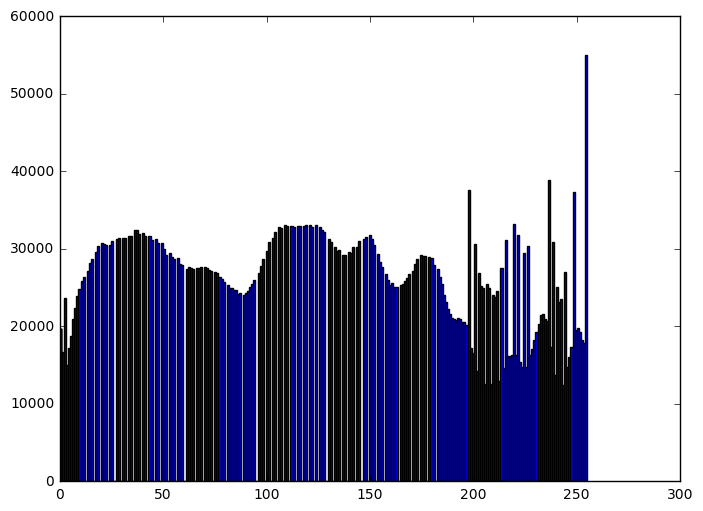

In [9]:
hist_im(steve_eq)

Compare the histogram above to the first histogram of this image. Notice that the histogram of the equalized image is more uniform in appearance. 

Next, compute and display the CDF of the equalized image by executing the code in the cell below.

'Done'

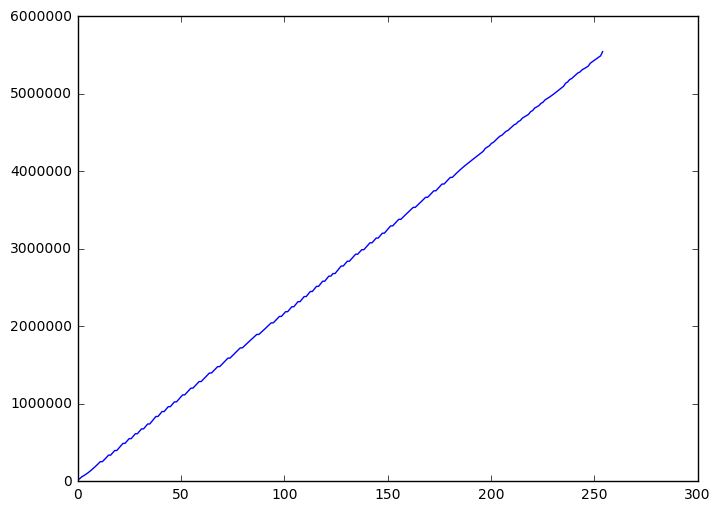

In [10]:
cdf_im(steve_eq)

Examine the CDF. Notice that it is a bit straighter than before. Both the histogram and CDF indicate that the statistics of the image have improved. 

Finally, compare the unequalized image to the equalized image. The code in the cell below plots two Numpy array images, side by side. Execute this code and examine the differences in the images.

'Done'

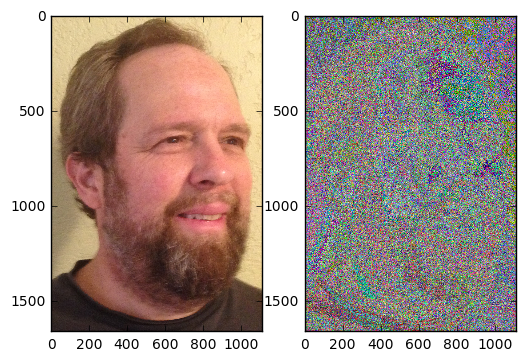

In [11]:
def plot_im2(im1, im2):
    import matplotlib.pyplot as plt
    import numpy as np
    fig, ax = plt.subplots(1, 2, figsize = (6,12))    
    ax[0].imshow(im1)  
    ax[1].imshow(im2)
    return 'Done'
plot_im2(steve, steve_eq)

The original image is on the left and the equalized image is on the right.  

## Image Manipulation

Now that you have examined some properties of images, you will now perform some basic image manipulation. 

Resizing is a common form of image manipulation. Images are often resampled to a smaller size to reduce the amount of data which must be processed. The **scipy.misc.imresize** method provides a convenient way to resize an image. Execute the code in the cell below and examine the result. 

'Done'

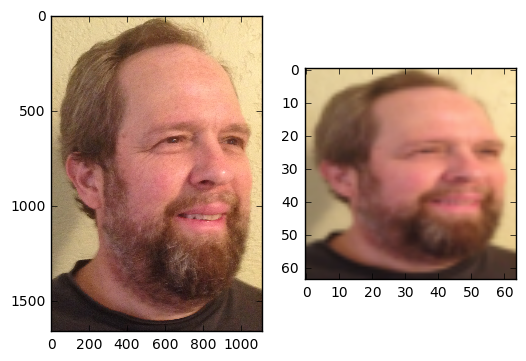

In [12]:
def resize(im, size = (64, 64)):
    import scipy.misc as mc
    return mc.imresize(im, size)   
plot_im2(steve, resize(steve))

The reduced size image on the right is quite a bit more granular and coarser than the one on the left. Still, there is strong resemblance which is good, considering the number of pixels has been reduced by a factor of over 500.  

Next you will rotate the image by 45 degrees. Rotation is performed by pixel interpolation. The code in the cell below uses the **scipy.ndimage.interpolation.rotate** method. Execute this code and examine the result.

'Done'

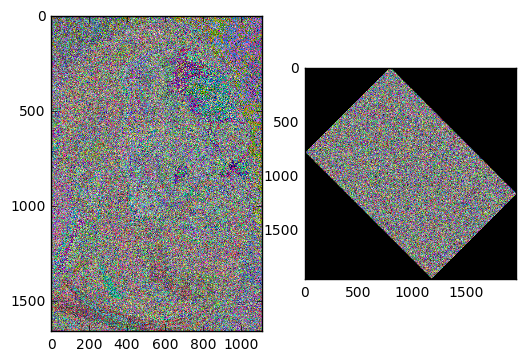

In [13]:
def rotate(im, angle = 45):
    from scipy.ndimage import interpolation
    return interpolation.rotate(im, angle)
plot_im2(steve_eq, rotate(steve_eq))

The rotated image on the right is a duplicate of the image on the left. Notice that the area around the rotated image has been backfilled with zero values. 

## Working with a list of images

Typically multiple images are analyzed as a group. This group of images can be stored as a list object in Python. 

Execute the code in the cell below to create a list of images. 

In [14]:
from PIL import Image
import requests
import numpy as np
from io import BytesIO

baseUrl = "https://github.com/MicrosoftLearning/Applied-Machine-Learning/raw/master/Labs/CarrotImages/Carrot"

image_list = []
for i in range(1,10):
    url = baseUrl + str(i) + ".JPG"
    response = requests.get(url)  
    img = np.array(Image.open(BytesIO(response.content)))
    image_list.append(img)
print ('done!')

done!


Now that you have loaded the list, check the number of images in the list by executing the code in the cell below. 

In [15]:
len(image_list)

9

The list contains 9 images.

Now, check the dimensions of the numpy image array. Execute the code in the cell below to display the dimensions of the first image in the list. 

In [16]:
image_list[0].shape

(2448, 3264, 3)

The Numpy image array has three dimensions. These are color images, with red, green and blue layers, each stored as 2x2 arrays. 

The code in the function below integrates over the images in the list and displays each one into an array of axes. Execute this code to view the images of carrots.

'Done'

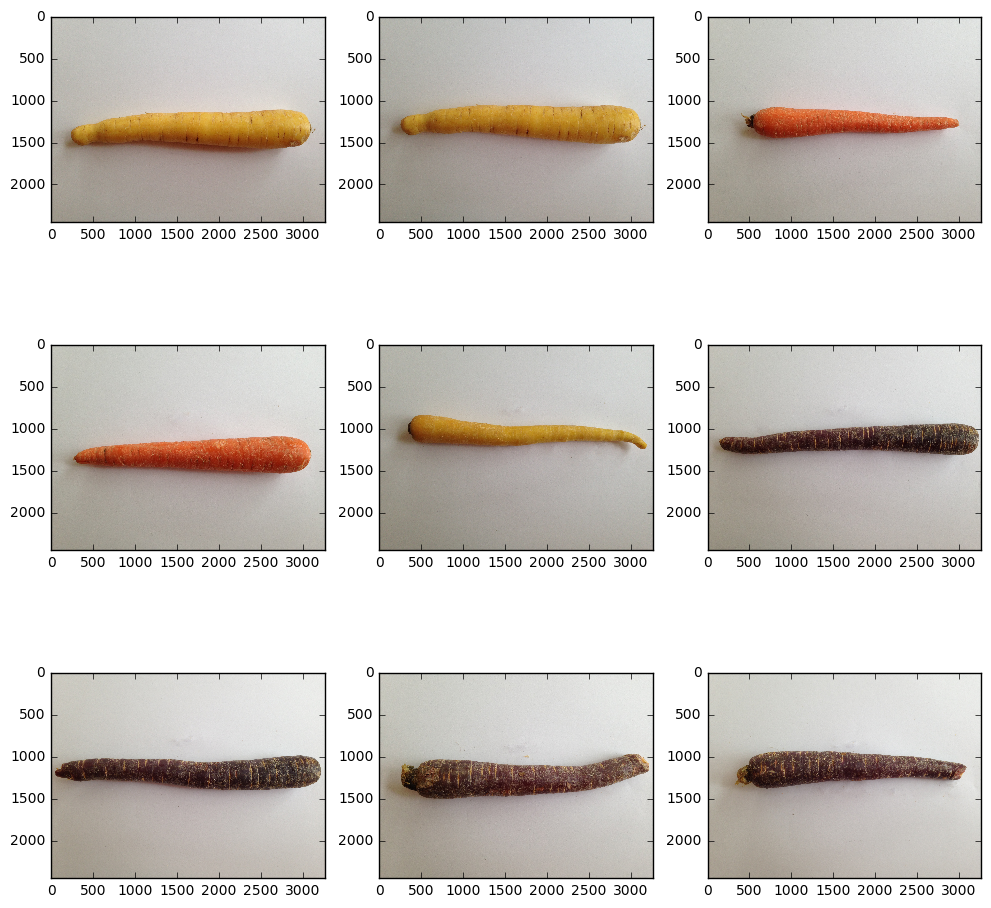

In [17]:
def plot_carrot(im_list):
    import matplotlib.pyplot as plt
    fig, ax = plt.subplots(3, 3, figsize = (12,12))
    j = -1
    for i, image in enumerate(im_list):
        k = i % 3
        if k == 0: j += 1
        ax[j,k].imshow(image)   
    return 'Done'
plot_carrot(image_list)

You can see the 9 images of carrots which have different shapes, several colors and different orientations.

The code in the cell below loops over the list of images and plots each histogram into an array of axes. Execute the code to display the image histograms.

'Done'

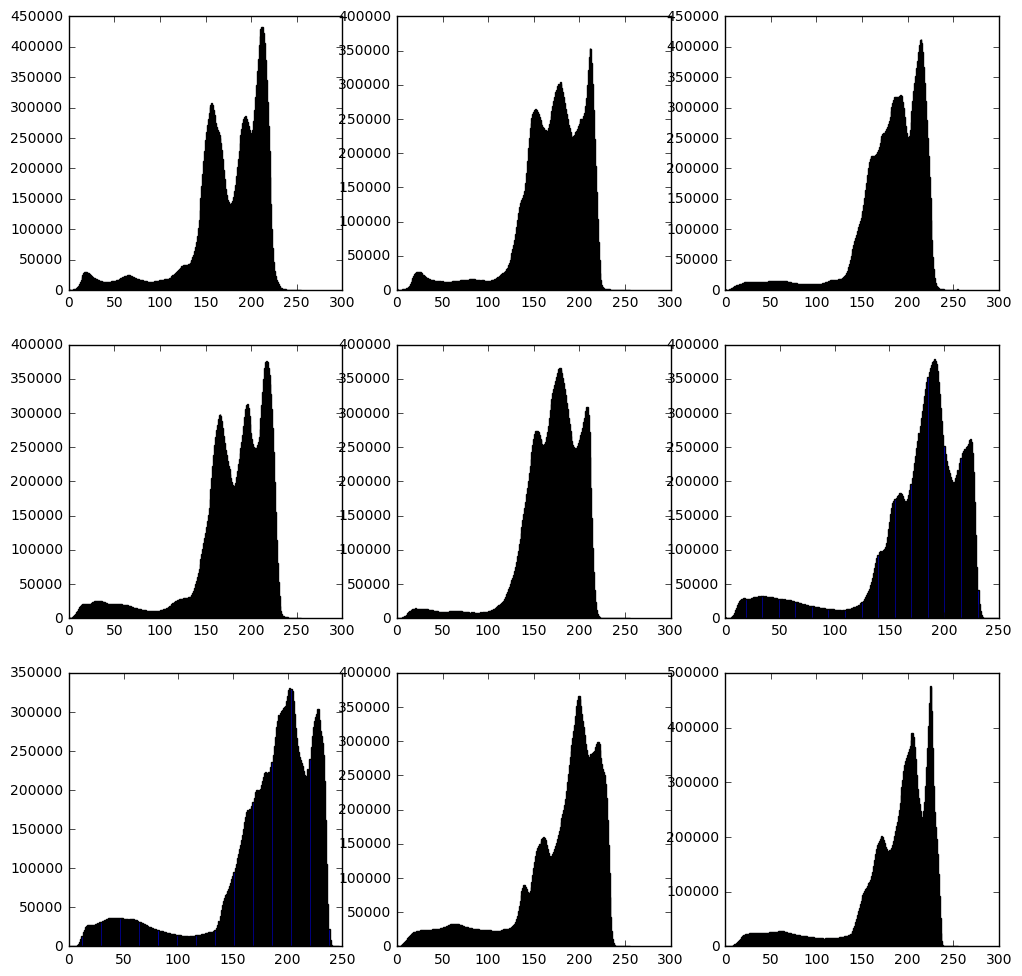

In [18]:
def hist_carrot(im_list, bins = 256): 
    """ Display histogram of flattened image"""
    import matplotlib.pyplot as plt    
    import numpy as np
    fig, ax = plt.subplots(3, 3, figsize = (12,12))
    j = -1
    for i, image in enumerate(im_list):
        k = i % 3
        if k == 0: j += 1
        ax[j,k].hist(np.array(image).flatten(), bins = bins)
    return 'Done'
hist_carrot(image_list)


Examine the histograms of the images. Notice that each image has a long left tail, arrising from the background. 

## Image Filtering

You have loaded some images, explored their properties, and performed some basic processing. Next, you will pre-whiten the carrot images by adding Gaussian noise. The process is essentially the same as before. 

The code in the cell below iterates over the images in the list and adds Gaussian noise to each image in turn.  Execute this code.

In [19]:
def pre_white(im_list, mean = 0, sd = 20):
    """Adds Gausian noise to the image"""
    from numpy.random import normal
    import numpy as np
    out = []
    for image in im_list:
        shape = image.shape
        ng = normal(loc = mean, scale = sd, size = shape[0] * shape[1] * shape[2])
        ng.shape = shape
        ng = np.add(ng, image)
        ng[np.where( ng < 0 )] = 0
        ng *= 255.0 / np.amax(ng)  # normalize
        ng = ng.astype(np.uint8)
        out.append(ng)
    return out
carrot_filter = pre_white(image_list)

Next, you will apply a Gaussian filter to the images. The code in the cell below iterates over the list of images and applies the filter to each image. Execute this code. 

In [20]:
def gauss_filter(im_list, sigma = 20):
    from scipy.ndimage.filters import gaussian_filter as gf 
    out = []
    for image in im_list:
        out.append(gf(image, sigma = sigma))
    return out    
carrot_filter = gauss_filter(carrot_filter)

Display the pre-whitened histograms and images by executing the code in the cell below. 

'Done'

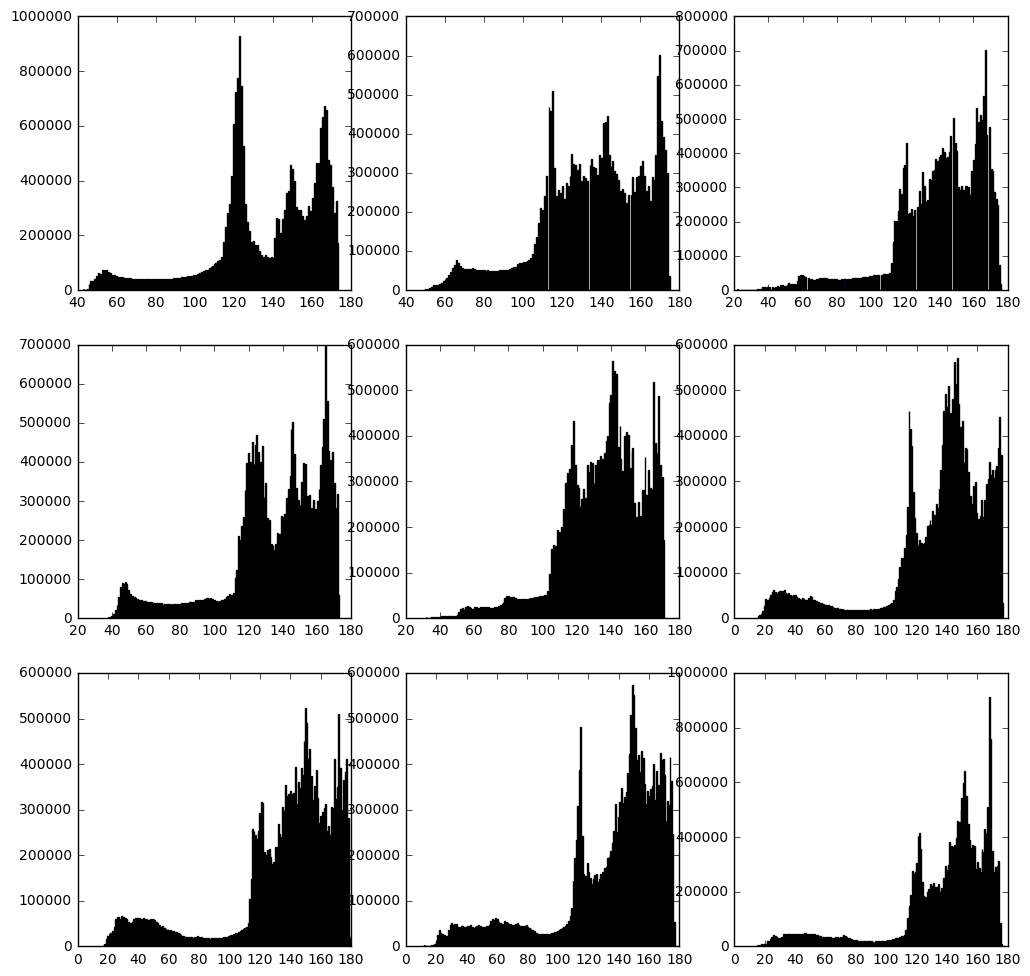

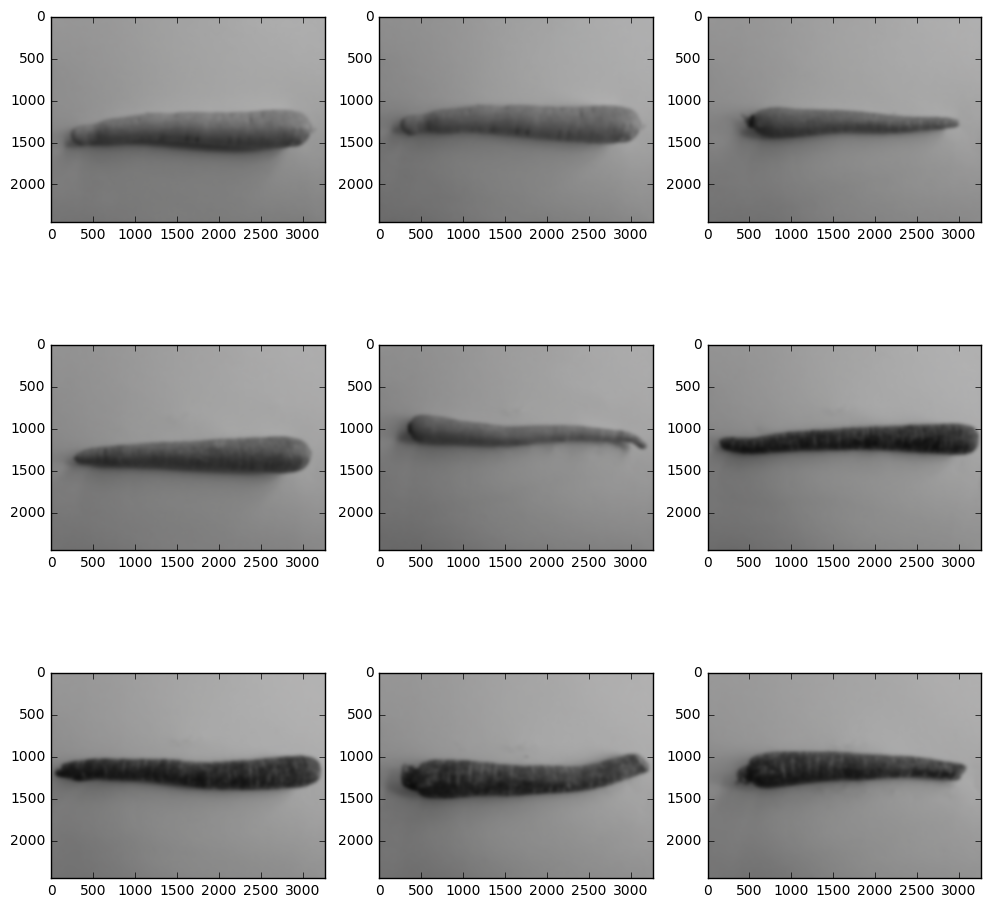

In [21]:
hist_carrot(carrot_filter)
plot_carrot(carrot_filter)

Compare these histograms and images to the original histograms and images, and notice the following:

- The histograms of the pre-whitened images have a more jagged appearance .
- The pre-whitened images are blurred or softer and have lost considerable color contrast when compared to the original images.

## Feature Extraction

You have explored, manipulated and filtered images. Now, you will extract features from the processed images. Feature extraction is an indispensable step in preparing image data for machine learning. 

As a first step in extracting features, you will apply the Sobel edge detection algorithm. The Sovel edge detection algorithm finds regions of the image with large gradient values in multiple directions. Regions with high omnidirectional gradient are likely to be edges or transitions in the pixel values. 

The code in the cell below applies the Sobel algorithm to a list of images, using these steps:

- The gradient in the x and y (horizontal and vertical) directions are computed. 
- The magnitude of the gradient is computed.
- The gradient values are normalized. 

Execute the code in the cell below to extract the edges. 

In [22]:
def edge_sobel(im_list):
    from scipy import ndimage
    import numpy as np
    out = []
    for image in im_list:
        dx = ndimage.sobel(image, 1)  # horizontal derivative
        dy = ndimage.sobel(image, 0)  # vertical derivative
        mag = np.hypot(dx, dy)  # magnitude
        mag *= 255.0 / np.amax(mag)  # normalize (Q&D)
        mag = mag.astype(np.uint8)
        out.append(mag)
    return out

carrot_filter = edge_sobel(carrot_filter)#

Execute the code in the cell below to plot the edges computed with the Sobel algorithms. 

'Done'

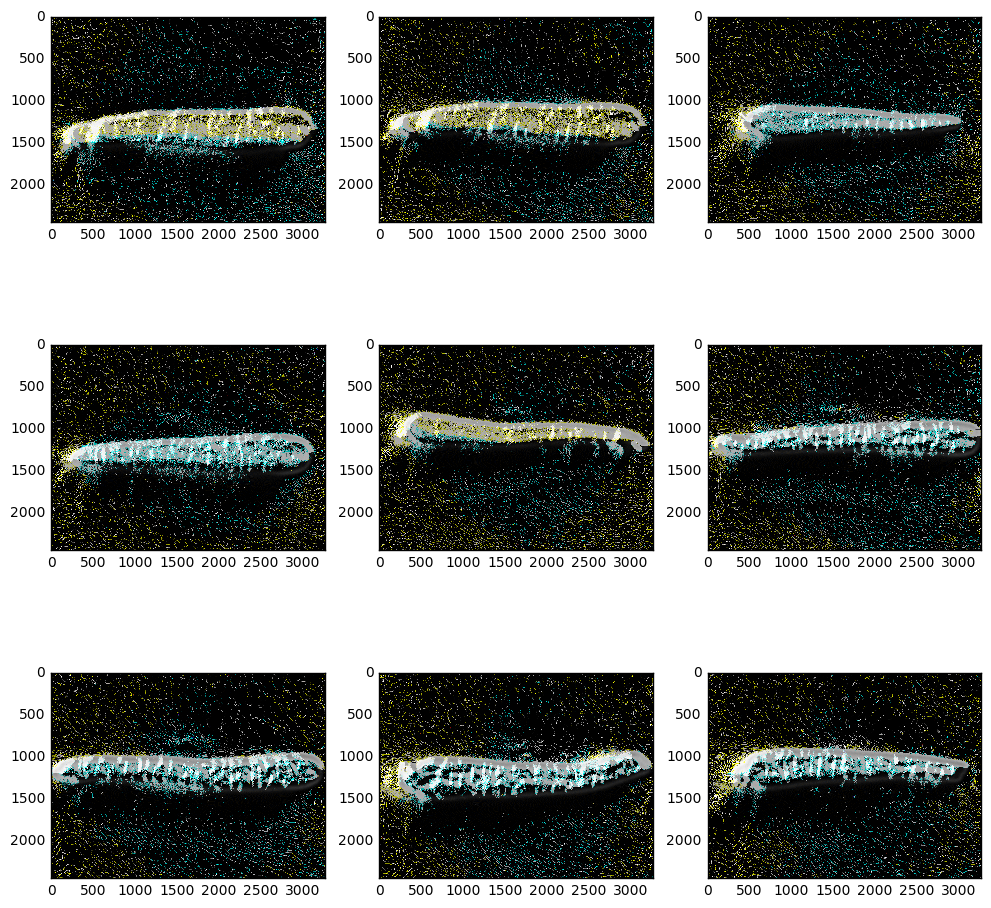

In [23]:
plot_carrot(carrot_filter)

Examine these images. Notice that the carrots now appear in a skeletal form. You can clearly see the edges of the carrots, along with the numerous cross marks on each carrot. These are the regions of the carrot image with high gradient in the pixel values. 

Execute the code in the cell below to plot the histograms of the gradients of the images.

'Done'

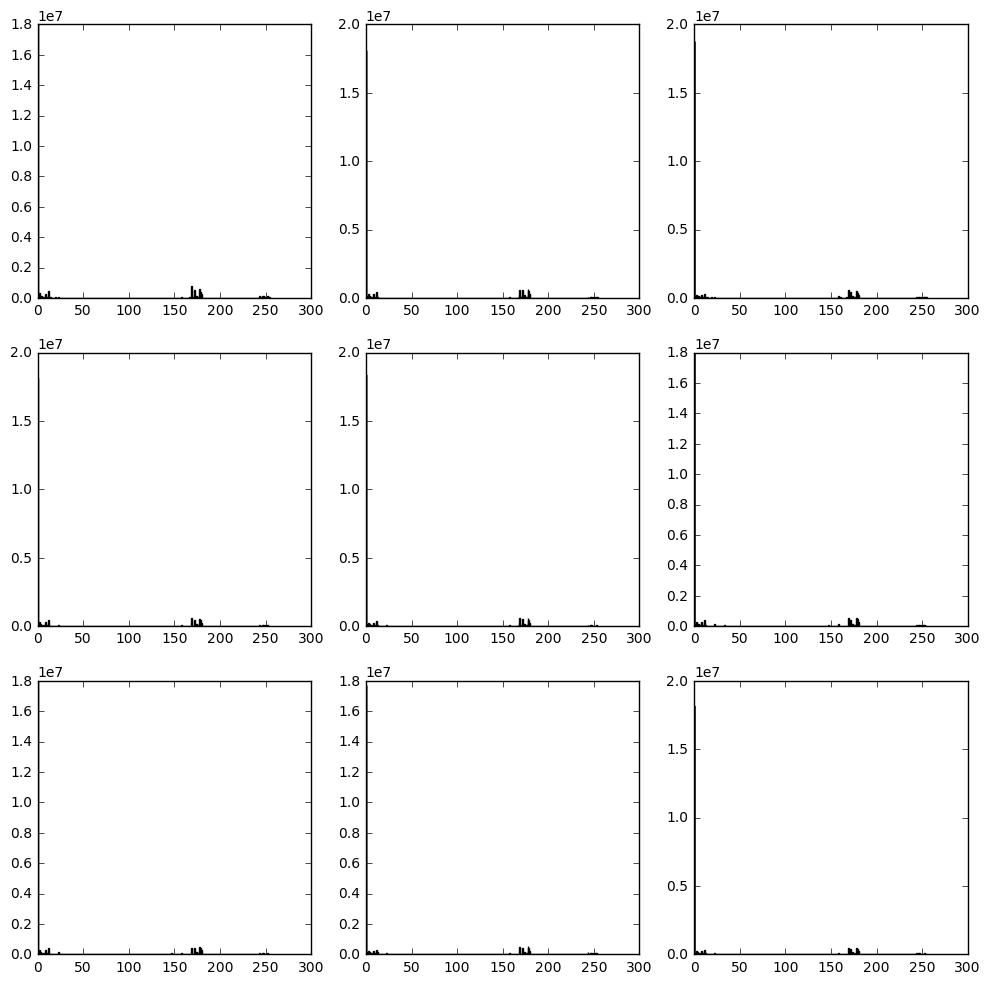

In [24]:
hist_carrot(carrot_filter)

The pixel values in each histogram are in three groups:

- The majority of the pixels have values at or near zero. These values represent regions of the image with little or no gradient. 
- There is a group of pixels with values between 150 and 180, which likely represent the noise seen in the images of the gradient. 
- The highest pixel values, above 220, are the edges of the image. 

****
#### Apply the Sobel Edge Detection Algorithm

You may well wonder what difference these preparation steps make. To see this difference, you will now apply the Sobel edge detection algorithm to the original carrot images. Compare the results to answer these questions: 

- When compared to the edges computed from the prepared images, are the edges of the carrots from the raw images more or less distinct?
- When compared to the edges computed from the prepared images, are the edges of the carrots from the raw images more or less noisy?

To panswer these questions, add code to the cell below:

- Start with the original list of carrot images in the **image_list** object. 
- Apply the **edge_sobel** function to the **image_list** object. Be sure to assign the result to **sobel_raw**, to ensure you do not overwrite other results in this notebook.
- Visualize the result with the **plot_carrot** function.
- Create histograms of the images with the **hist_carrot** function. 

****

'Done'

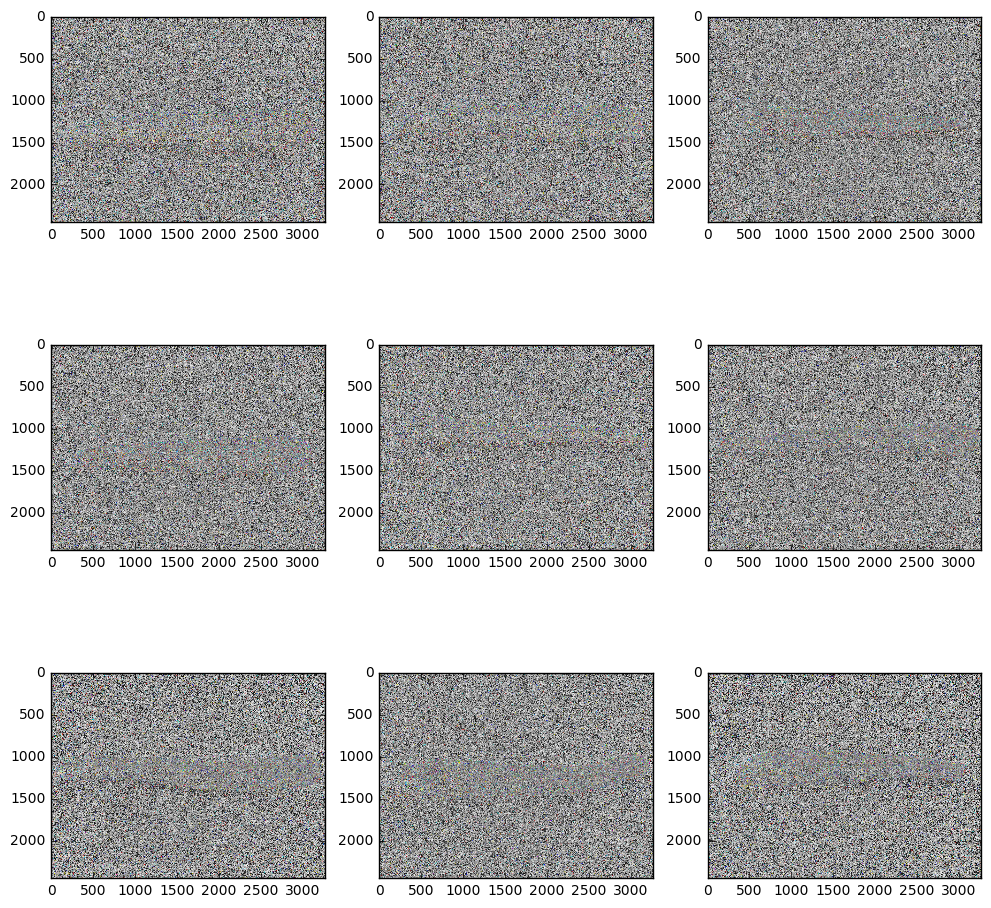

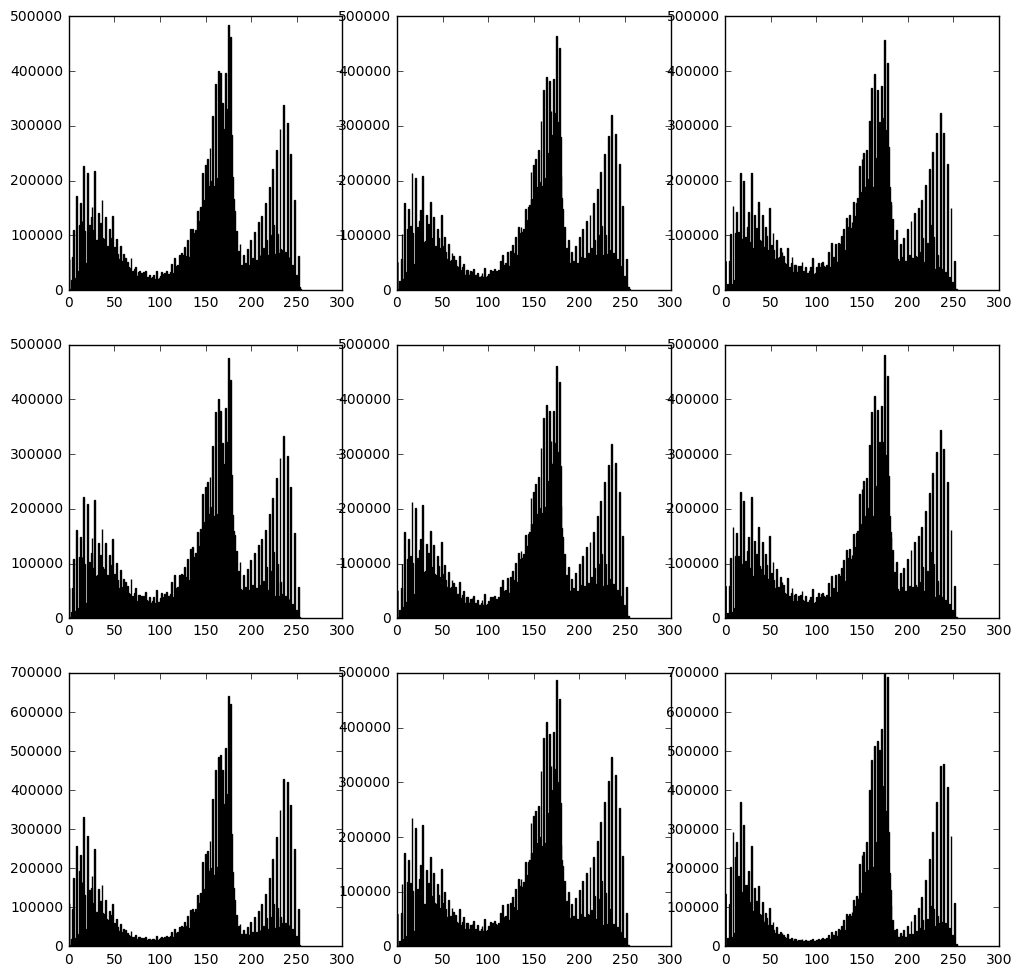

In [25]:
sobel_raw = edge_sobel(image_list)
plot_carrot(sobel_raw)
hist_carrot(sobel_raw)

## Segmentation

Image segmentation is a process of segregating certain regions or segments. Thresholding of pixel values on the image is a simple segmentation algorithm. 

The code in the cell below thresholds the pixel values in each image in a list. All pixel values below the threshold are set to zero. Execute the code to threshold the image at a pixel value of 200. 

In [26]:
def threshold(im_list, thresh = 200):
    import numpy as np 
    out = []
    for image in im_list:
        image[np.where( image < thresh )] = 0
        out.append(image)
    return out
carrot_filter = threshold(carrot_filter)

Execute the code in the cell below to view the resulting thresholded images.

'Done'

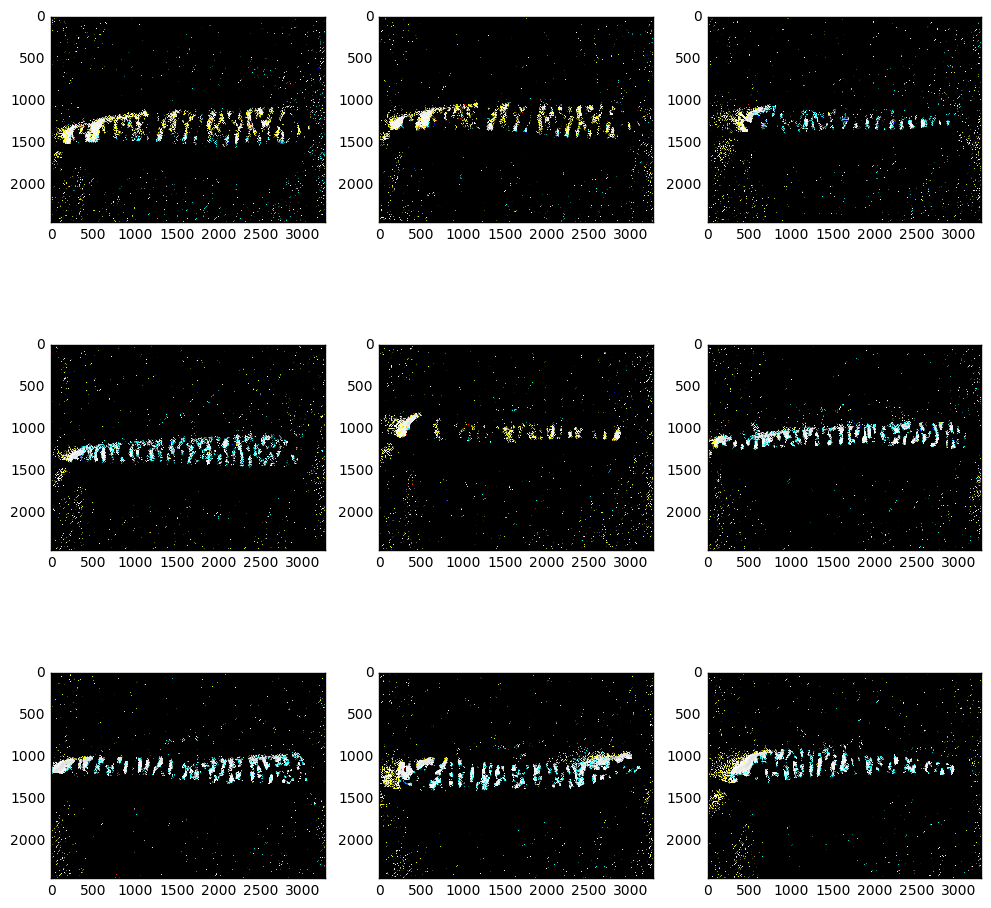

In [27]:
plot_carrot(carrot_filter)

Examine these results, noticing the edges of the carrots remain and are more distinctive than before thresholding. There are shadows in the image which have also been enhanced, however. 

## Corner Detection

Another example of a feature extraction algorithm is corner detection. In simple terms, the Harris corner detection algorithm locates regions of the image with large changes in pixel values in all directions. These regions are said to be corners. The Harris corner detector is paired with the **corner_peaks** method. This operator filters the output of the Harris algorithm, over a patch of the image defined by the span of the filters, for the most likely corners.  

As a simple example of corner detection you will start with a simple square shape. Execute the code in the cell below to create and display a matrix containing a square. 

'Done'

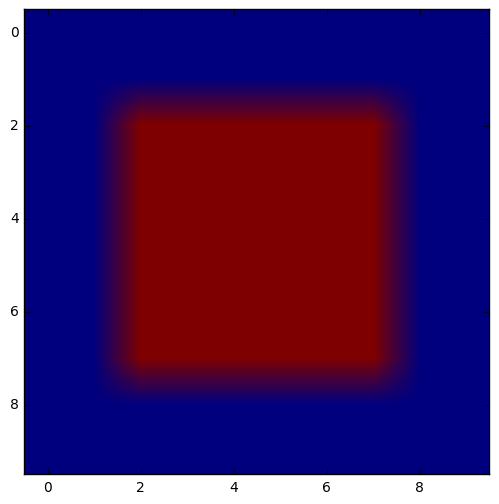

In [28]:
import numpy as np
square = np.zeros([10, 10])
square[2:8, 2:8] = 1
plot_im(square)

The code in the cell below, applies the Harris corner detector and the **corner_peaks** algorithm to the square. Execute this code to view the result.

In [29]:
from skimage.feature import corner_harris, corner_peaks
crn = corner_peaks(corner_harris(square), min_distance=1)
crn

array([[2, 2],
       [2, 7],
       [7, 2],
       [7, 7]])

The corner detector has located four corners. You can see the list of the coordinates above.

The code in the cell below plots the corners on top of the image. Execute this code to display the image with the corners. 

'Done'

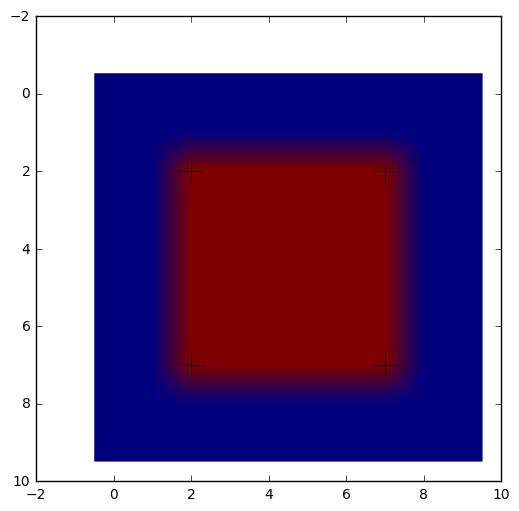

In [30]:
def plot_harris(im, harris, markersize = 20, color = 'red'):
    import matplotlib.pyplot as plt
    import numpy as np
    fig = plt.figure(figsize=(8, 6))
    fig.clf()
    ax = fig.gca()    
    ax.imshow(np.array(im).astype(float))
    ax.plot(harris[:, 1], harris[:, 0], 'r+', color = color, markersize=markersize)
    return 'Done'  
plot_harris(square, crn, color = 'black')

Notice, that four corners of the square have been correctly detected. 

## Image Morphology

Morphology methods are often used to enhance image features. Using these methods, a set of features can be cleaned and made more consistent.  

### Erosion

The first morphology method you will apply is erosion. Erosion is a fundamental operation and forms the basis of some other morphology operators. An erosion operator removes or erodes pixels at the edge of objects, by setting the values to zero. 

The code in the cell blow creates a simple image containing a rectangle. Execute this code to create the image. 

In [31]:
import numpy as np
from skimage import morphology
import matplotlib.pyplot as plt
a = np.zeros((7,7), dtype=np.int)
a[1:6, 2:5] = 1
a

array([[0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 1, 0, 0],
       [0, 0, 1, 1, 1, 0, 0],
       [0, 0, 1, 1, 1, 0, 0],
       [0, 0, 1, 1, 1, 0, 0],
       [0, 0, 1, 1, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0]])

Execute the code in the cell below to visualize the image.

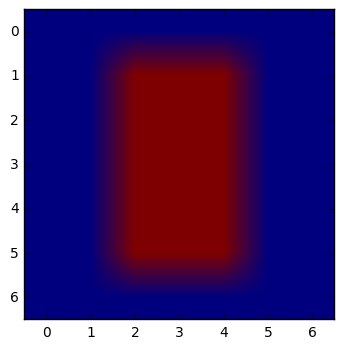

In [32]:
plt.imshow(a)

The code in the cell below erodes the image using a square shaped 2x2 operator. Execute this code to apply the erosion operator and display the result.

[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 1 1 0 0]
 [0 0 0 1 1 0 0]
 [0 0 0 1 1 0 0]
 [0 0 0 1 1 0 0]
 [0 0 0 0 0 0 0]]


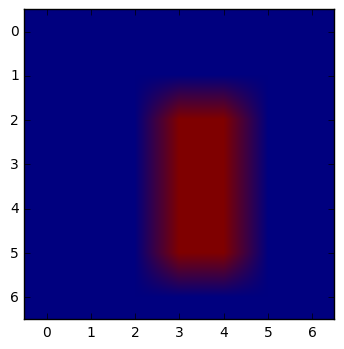

In [33]:
a_erosion = morphology.binary_erosion(a, np.ones((2,2))).astype(np.uint8)
print(a_erosion)
plt.imshow(a_erosion)

The erosion operator has reduced the size of the rectangle by one pixel in each dimension. 

Now, you will apply the erosion operator to the results of the edge detection you applied to the carrot images. Since the carrot image has color, represented by a n x m x 3-d array, a 3-d operator is used. This is opposed to the gray scale face image which is represented by a n x m x 1-d array.

The code in the cell below interates over the list of images, applying the erosion operator to each in turn. Execute this code to apply the erosion operator and plot the results. 

'Done'

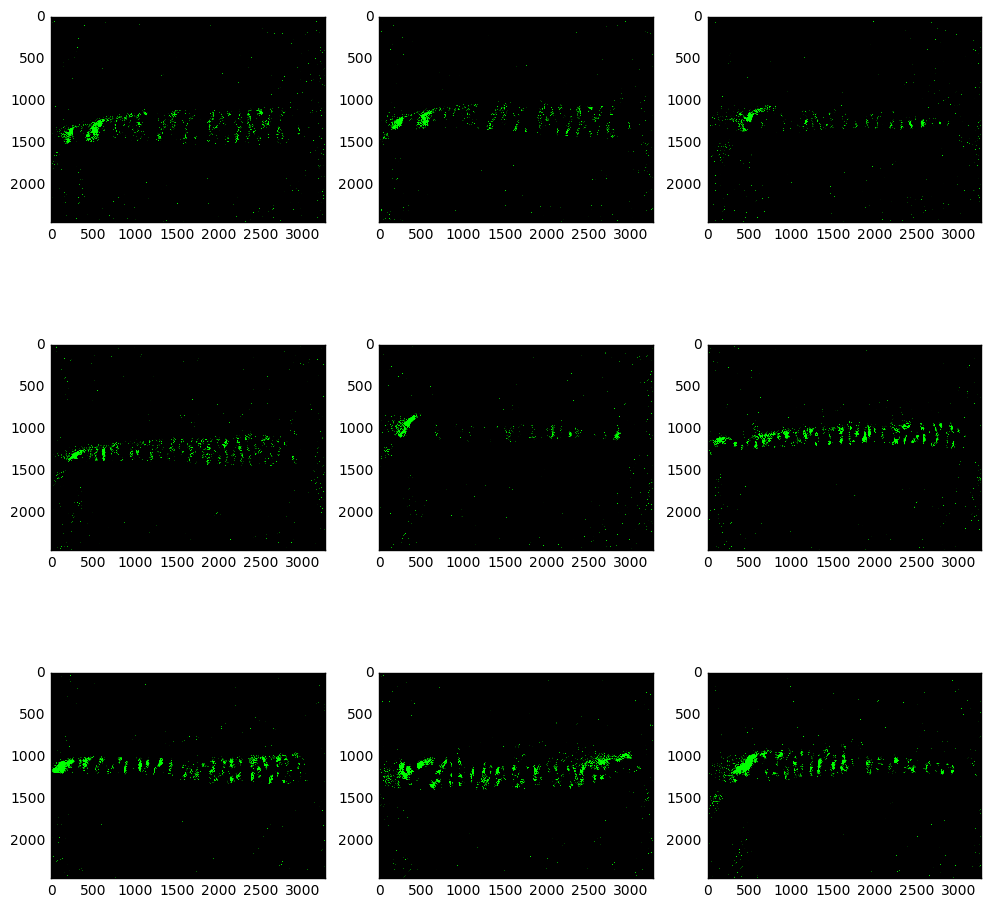

In [34]:
def im_erosion(im_list, structure = (4,4,3)):
    from scipy.ndimage import morphology
    import numpy as np
    out = []
    for image in im_list:
        out.append(morphology.binary_erosion(image,structure=np.ones(structure)))
    return out
carrot_erosion = im_erosion(carrot_filter, structure = (2,2,3))
plot_carrot(carrot_erosion)

Compare this images to the images resulting from applying edge detection and segmentation. The features of the carrots themselves are thiner. Additionally, the noise is less noticeable. 

### Dilation

Dilation is another fundamental morphology operator. A dilation operator accretes pixels to image features. In effect, the image features are expanded or thickened. 

Execute the code in the cell below to create an image with a single positive pixel.

In [35]:
a = np.zeros((7,7), dtype=np.int)
a[3, 3] = 1
a

array([[0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0]])

View the image with a single positive pixel by executing the code in the cell below. 

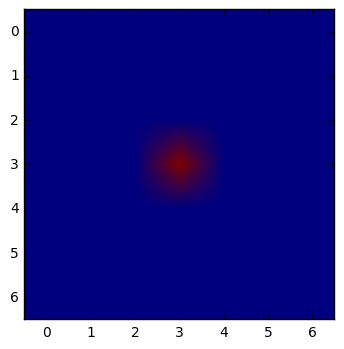

In [36]:
plt.imshow(a)

As before, a 2x2 square operator is used. Apply a diamond shaped dilation operator to the simple image you have created by executing the code in the cell below.

[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 1 1 0 0 0]
 [0 0 1 1 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]]


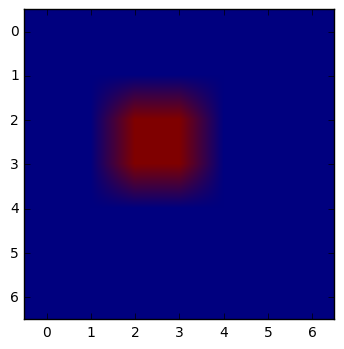

In [37]:
a_dilation = morphology.binary_dilation(a, np.ones((2,2))).astype(np.uint8)
print(a_dilation)
plt.imshow(a_dilation)

The image has accreted a row and column of non-zero pixels on the upper and left edges.

### Opening

Opening is a morphological operation comprised of an erosion operator followed by a dilation operator. Opening is useful in cleaning certain types of noise from images. For example, opening tends to create better separated features in an image. 

Execute the code below to create a image with a square and a single non-zero pixel in the lower right corner. 

In [38]:
a = np.zeros((7,7), dtype=np.int)
a[1:6, 1:6] = 1
a[6, 6] = 1
a

array([[0, 0, 0, 0, 0, 0, 0],
       [0, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 0],
       [0, 0, 0, 0, 0, 0, 1]])

Execute the code in the cell below to view the image. 

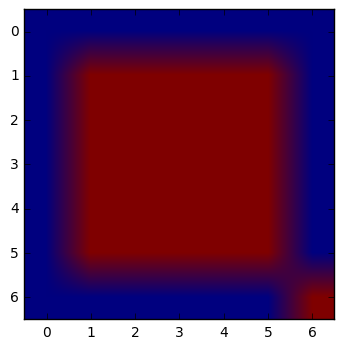

In [39]:
plt.imshow(a)

Apply the morphological opening operator to the image, by executing the code in the cell below. 

[[0 0 0 0 0 0 0]
 [0 1 1 1 1 1 0]
 [0 1 1 1 1 1 0]
 [0 1 1 1 1 1 0]
 [0 1 1 1 1 1 0]
 [0 1 1 1 1 1 0]
 [0 0 0 0 0 0 0]]


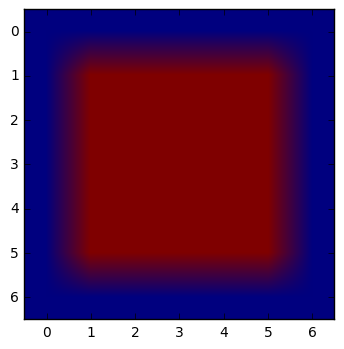

In [40]:
a_open = morphology.binary_opening(a, np.ones((2,2))).astype(np.uint8)
print(a_open)
plt.imshow(a_open)

Compare the result to the original image. The pixel in the lower right has been set to zero. The image of the square retains its original dimensions. In effect, the non-zero pixel in the lower right corner has been filtered as though it was noise. Retaining the dimensions of the square is the result of following the opening operator with a dilation operator. 

The code in the cell below applies the opening operator to the list of carrot edge images. Notice that the operator shape is asymmetric. Since the carrot edge features to be enhanced are elongated, mostly in the vertical (y) direction, an operator longer than it is wide is chosen. Execute this code to apply the opening operator and view the results.

'Done'

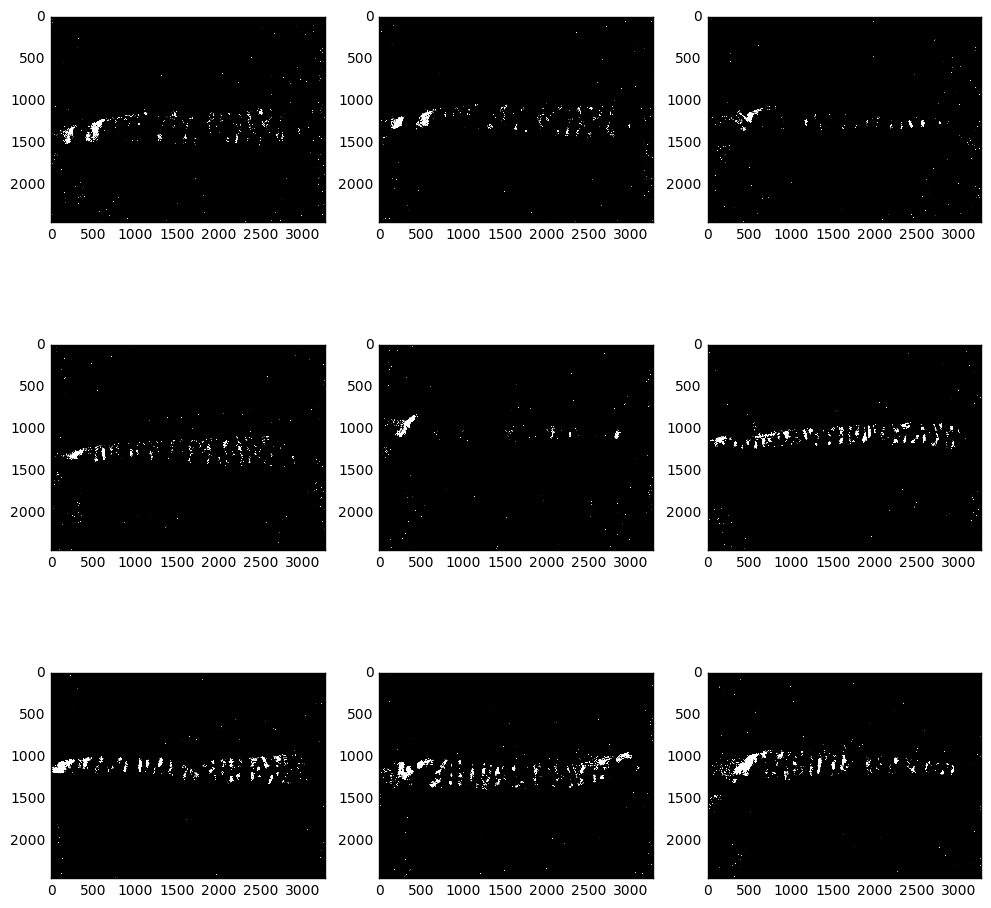

In [41]:
def im_open(im_list, structure = (2,2,1)):
    from scipy.ndimage import morphology
    import numpy as np
    out = []
    for image in im_list:
        out.append(morphology.binary_opening(image,structure=np.ones(structure)))
    return out
carrot_open = im_open(carrot_filter, structure = (2,4,3))
plot_carrot(carrot_open)

Examine these images and compare them to the original images of the carrot edge features. Notice that much of the noise has been eliminated by applying the opening operator. Dispite the reduction in noise, many essential features of the carrot edges have been retained. However, the features are thinner. 

****
#### Change the Oprator Shape for Opening

You will now investigate how changing the operator shape affects the results of the opening operation. To see this difference, you will now apply the opening operator with a shape defined by **(8,8,3)**. You will then compare the result to the carrot edge images created with an operator shape of **(3,3,3)**, to answer these questions: 

- Are the carrot edge features better preserved by the larger or smaller opening operator?
- Does the carrot edge feature created by the larger or smaller opening operator have less noise?


To answer these questions, add code to the cell below:

- Start with the **carrot_filer** image list. 
- Apply the **im_open** function to the **carrot_filer** objectm with the **structure = (8,8,3)** argument. 
- Visualize the result with the **plot_carrot** function.

****

### Closing

Opening is a morphological operation comprised of a dilation operator followed by an erosion operator, the opposite order of an opening operation. Like the opening operator, the closing operator can be useful in reducing noise when extracting features from images.

The code in the cell below creates a square with a hole in the middle. Execute the code to create and view this image.

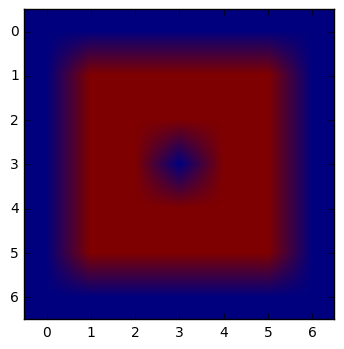

In [42]:
a = np.zeros((7,7), dtype=np.int)
a[1:6, 1:6] = 1
a[3,3] = 0
plt.imshow(a)

Apply the morphological closing operator to this image by executing the code in the cell below. 

[[0 0 0 0 0 0 0]
 [0 1 1 1 1 1 0]
 [0 1 1 1 1 1 0]
 [0 1 1 1 1 1 0]
 [0 1 1 1 1 1 0]
 [0 1 1 1 1 1 0]
 [0 0 0 0 0 0 0]]


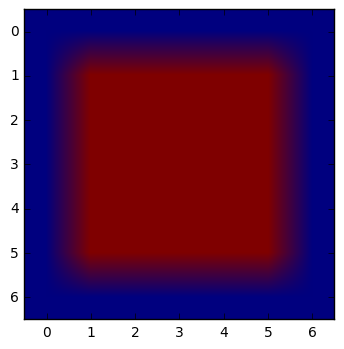

In [43]:
a_close = morphology.binary_closing(a, np.ones((2,2))).astype(np.uint8)
print(a_close)
plt.imshow(a_close)

Compare the result to the original image. The hole in the square has been healed. The image of the square retains its original dimensions. Retaining the dimensions of the square is the result of following the dilation operator with an erosion operator. 

The code in the cell below applies the closing operator to the list of carrot images. Notice that the operator shape is asymetric. Since the carrot edge features to be enhanced are elongated mostly in the vertical (y) direction, an operator longer than it is wide is chosen. Execute this code to apply the closing operator and view the results. 

'Done'

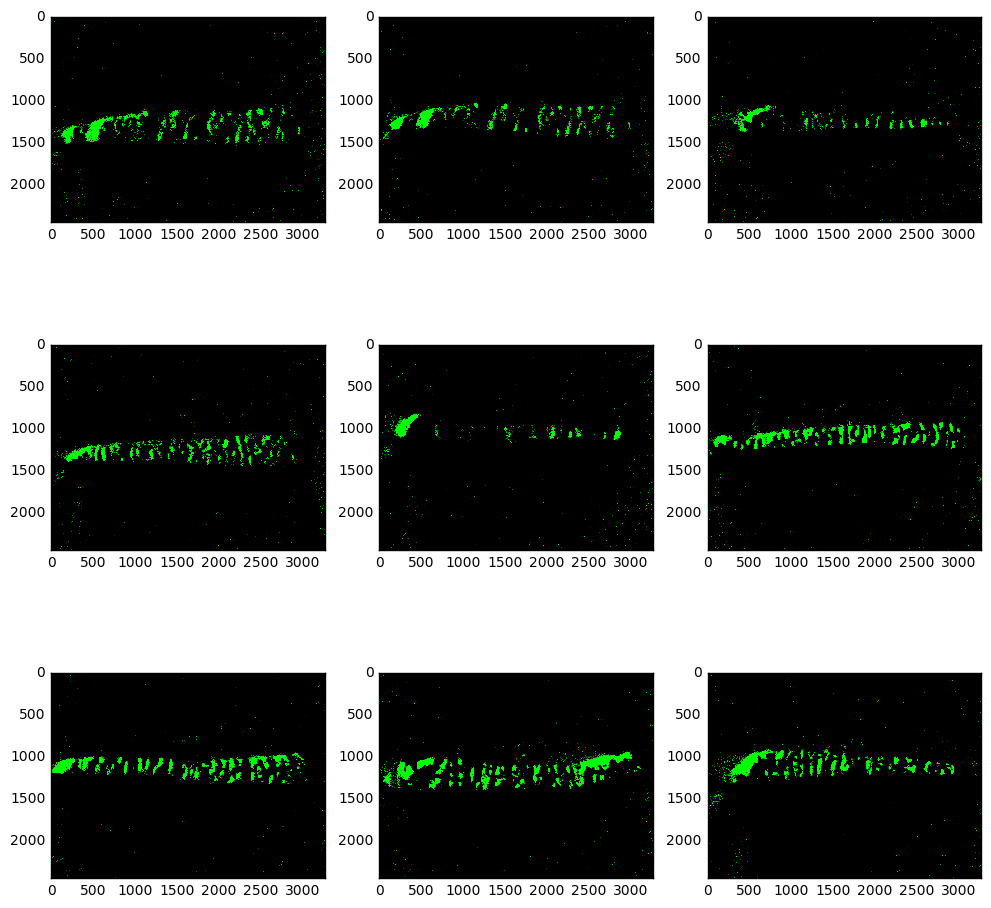

In [44]:
def im_close(im_list, structure = (2,2,3)):
    from scipy.ndimage import morphology
    import numpy as np
    out = []
    for image in im_list:
        out.append(morphology.binary_closing(image,structure=np.ones(structure)))
    return out
carrot_close = im_close(carrot_erosion, structure = (2,6,3))
plot_carrot(carrot_close)

Examine these images and compare them to the original images of the carrot edge features after segmentation. Notice that the much of the noise has been reduced by applying the closing operator. Despite the reduction in noise nearly all the essential features of the carrot edges are retained.  

****
#### Change the Operator Shape for Closing

You will now investigate how changing the operator shape affects the results of the closing operation. To see this difference, apply the closing operator with a shape defined by **(6,12,3)** to the carrot edge images. Compare this result to the result created with an operator shape of **(2,6,3)**, to answer these questions: 

- Are the carrot edge features better preserved by the larger or smaller closing operator?
- Does the carrot edge feature, created by the larger or smaller closing operator have less noise?
- Of the four operators you have tried, a) **opening (2,4,3)**, b) **opening (8,8,3)**, c) **closing (2,6,3)** and **closing (6,12,3)**, which do you think does the best job reducing noise while preserving the carrot edge features?


To answer these questions, add cxode to the cell below:

- Start with the **carrot_filer** image list. 
- Apply the **im_close** function to the **carrot_filer** image list object with the **structure = (6,12,3)** argument. 
- Visualize the result with the **plot_carrot** function.

****


## Summary

In this lab you performed a number of steps to create images with features which can be used in machine learning models. You achieved this through the following steps:
    
- Loaded and explored the properties of the images.
- Equalized the image histograms.
- Plotted images.
- Added noise (pre-whitened) and filtered images.
- Extracted features from the images.
- Applied morphological operators to the image features. 